<a href="https://colab.research.google.com/github/vardhanreddy2003/Deep_learning/blob/main/Customerchurnprediction(using_ann).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True).astype(int)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [ ]:
X=df.drop(columns=["Exited"])
y=df["Exited"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.fit_transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras

from keras import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(11,activation="sigmoid",input_dim=11))
model.add(Dense(11,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2181 - loss: 0.9728 - val_accuracy: 0.8025 - val_loss: 0.6339
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7973 - loss: 0.5897 - val_accuracy: 0.7987 - val_loss: 0.5061
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.5070 - val_accuracy: 0.7987 - val_loss: 0.4802
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7978 - loss: 0.4802 - val_accuracy: 0.7987 - val_loss: 0.4697
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.4812 - val_accuracy: 0.7987 - val_loss: 0.4617
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.4712 - val_accuracy: 0.7987 - val_loss: 0.4541
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4584 - val_accuracy: 0.7987 - val_loss: 0.4472
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4562 - val_accu

In [ ]:
y_pred=model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred

array([[0.04259671],
       [0.0271522 ],
       [0.19355886],
       ...,
       [0.78599876],
       [0.07534395],
       [0.2427989 ]], dtype=float32)

In [ ]:
y_pred=np.where(y_pred>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8575

In [ ]:
history.history

{'accuracy': [0.32515624165534973,
  0.7940624952316284,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7948437333106995,
  0.7989062666893005,
  0.8087499737739563,
  0.8103125095367432,
  0.8129687309265137,
  0.8148437738418579,
  0.815625011920929,
  0.8157812356948853,
  0.8167187571525574,
  0.819531261920929,
  0.8198437690734863,
  0.8235937356948853,
  0.8251562714576721,
  0.8274999856948853,
  0.8268749713897705,
  0.8298437595367432,
  0.83203125,
  0.8345312476158142,
  0.8348437547683716,
  0.8360937237739563,
  0.8365625143051147,
  0.8376562595367432,
  0.839062511920929,
  0.8389062285423279,
  0.8414062261581421,
  0.8417187333106995,
  0.8443750143051147,
  0.84375,
  0.8460937738418579,
  0.84765625,
  0.8482812643051147,
  0.84765625,
  0.8490625023841858,
  0.8506249785423279,
  0.8515625,
  0.8528125286102295,
  0.8537499904632568,
  0.854687511920929,
 

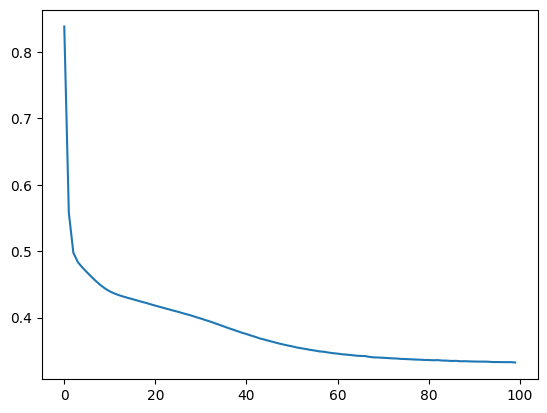

In [ ]:
plt.plot(history.history["loss"])

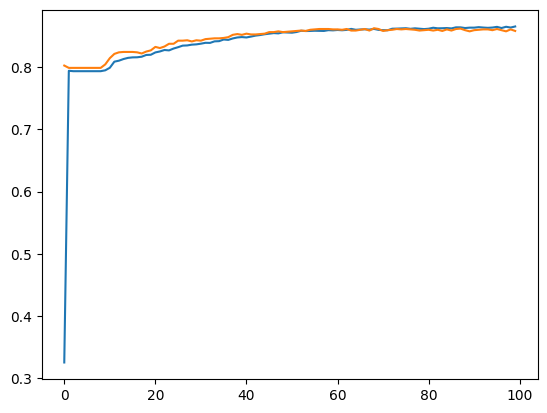

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])